**Instituto Tecnológico de Aeronáutica – ITA**

**Inteligência Artificial para Robótica Móvel – CT-213**

**Professores:** 

Marcos Ricardo Omena de Albuquerque Maximo

André Oliveira Françani


# Laboratório 10 – Programação Dinâmica

# 1. Introdução
 
Nesse laboratório, seu objetivo é implementar algoritmos de programação dinâmica no contexto de solução de um Processo Decisório de Markov (*Markov Decision Process* - MDP). Os algoritmos implementados serão avaliação de política (*policy evaluation*), iteração de política (*policy iteration*) e iteração de valor (*value iteration*). No caso, o objetivo é avaliar políticas e determinar políticas ótimas para um *grid world*, conforme ilustra a Figura 1. Perceba que esses algoritmos resolvem o problema de Aprendizado por Reforço (*Reinforcement Learning* - RL) no caso em que o modelo do MDP é conhecido.



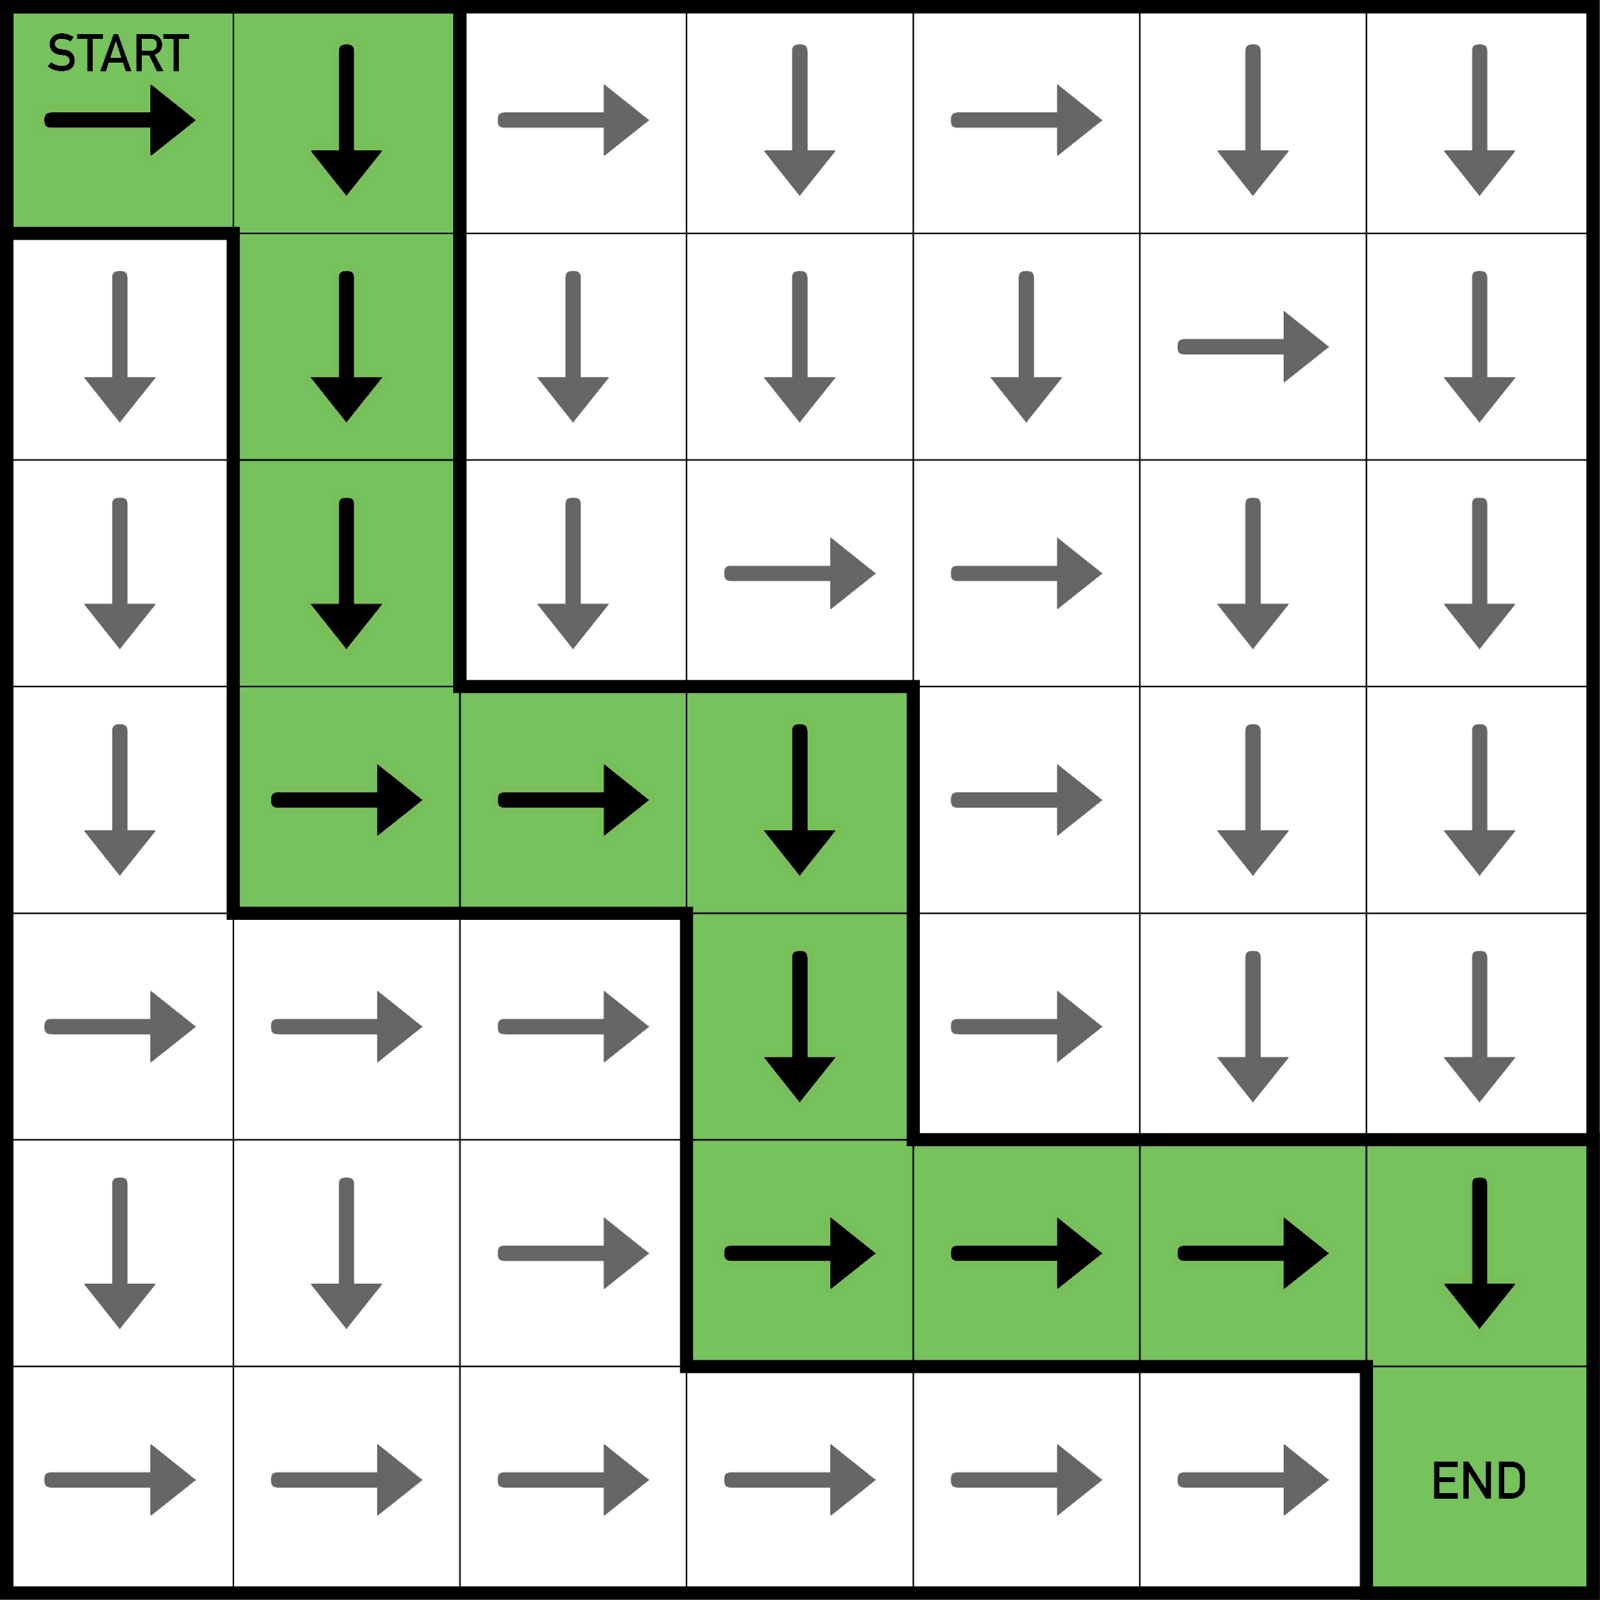

**Figura 1**: exemplo de política ótima em *grid world*.

# 2. Descrição do Problema

O problema consiste em um *grid world* com 5 ações possíveis:

- **S**TOP: continua parado na mesma posição.
- **U**P: move-se uma célula para cima no tabuleiro.
- **R**IGHT: move-se uma célula para direita no tabuleiro.
- **D**OWN: move-se uma célula para baixo no tabuleiro.
- **L**EFT: move-se uma célula para esquerda no tabuleiro.

Considera-se que a ação STOP sempre é executada com perfeição, i.e. com probabilidade 1, o agente permanece na mesma posição após executar essa ação. Já as demais ações tem uma probabilidade $p_c$ de serem executadas corretamente. Se a ação não for executada corretamente, o resultado de uma das demais ações acontece com igual probabilidade, i.e. com $\frac{1-p_c}{4}$. No *grid world*, há obstáculos, que ocupam algumas células do *grid*. Se um determinado movimento for levar o agente para um obstáculo, então o agente permanece na sua posição. Ademais, os limites do *grid* são também barreiras. Além dessas questões, o MDP tem fator de desconto $\gamma$ e a recompensa é -1 para cada instante que o agente passa em uma célula que não é a objetivo. Há uma única célula objetivo no *grid*, onde o agente recebe recompensa 0.

Conforme discutido em sala, o algoritmo de avaliação de política é baseado na equação de Bellman de expectativa:

$$ v_{\pi}(s) = \sum_{a \in A} \pi (a | s)r(s,a) + \gamma \sum_{a \in A} \sum_{s^\prime \in S} \pi (a | s) p(s^{\prime}|s,a) v_\pi (s^{\prime})$$

A ideia do algoritmo é realizar a solução iterativa do sistema de equações lineares associado.

Já o algoritmo de iteração de política alterna entre avaliação de política e aprimoramento de política. O aprimoramento é realizado através de tomar uma política gulosa (*greedy*) a partir da função valor da atual política. Pode-se mostrar que esse algoritmo converge para a política ótima. Uma política gulosa (*greedy*) determinística é obtida da seguinte forma:

$$ \pi^{\prime}(s) = greedy(v_{\pi} (s))$$

$$ \pi^{\prime}(s) = \operatorname*{arg\,max}_{ a \in A} \left( r(s,a) + \gamma \sum_{s^{\prime} \in S} p(s^{\prime}| s, a) v_\pi (s^{\prime}) \right) $$

Nesse caso, quando há mais de uma ação ótima para um certo estado, considera-se que qualquer ação ótima pode ser executada, com igual probabilidade. Com isso, tem-se uma política gulosa estocástica. Um ponto interessante de iteração de política é que não é necessário avaliar a política atual até convergência do algoritmo de avaliação de política para que a iteração de política como um todo convirja para a política ótima.
O algoritmo de iteração de valor abandona a ideia de alternar entre avaliação de política e aprimoramento de política e se baseia em iterar diretamente sobre a função valor de acordo com a equação de otimalidade de Bellman:

$$ v_{*}(s) = \max_{a \in A} \left( r(s,a) + \gamma \sum_{s^{\prime} \in S} p(s^{\prime} | s, a) v_\pi (s^{\prime}) \right)  $$

Com isso, pode-se mostrar que a iteração de valor converge para a função valor ótima. Após a convergência deste algoritmo, a política ótima pode ser obtida de forma gulosa:

$$ \pi^{\prime}(s) = greedy(v_{*} (s))$$

Como comentado anteriormente, caso haja mais de uma ação ótima para um estado, pode-se adotar uma política estocástica em que cada ação ótima é escolhida com igual probabilidade.

# 3. Código Base

O código base traz as seguintes implementações prontas:

- GridWorld: classe que implementa um *grid world*, considerando o que foi descrito na Seção 2. Principais métodos que são interessantes para as tarefas deste laboratório:
  - get_valid_sucessors(position): retorna uma lista de pares ordenados contendo os sucessores válidos da posição passada como argumentos. Para filtrar quem são sucessores válidos, elimina-se posições que fiquem fora do *grid* ou que contenham um obstáculo.
  - transition_probability(s, a, s’): retorna o valor de p(s'|s,a).
  - reward(s, a): retorna o valor de r(s,a).

- dynamic_programming: as funções `random_policy()` e `greedy_policy()` já estão implementadas e criam uma política aleatória e gulosa (com respeito a uma função valor), respectivamente. Você deve implementar as seguintes funções:
  - policy_evaluation(): realiza avaliação de política.
  - policy_iteration(): realiza iteração de política.
  - value_iteration(): realiza iteração de valor.

Para testar suas implementações, use o script test_dynamic_programming.py. Um exemplo de saída deste código é apresentado na Tabela 1. Perceba que * indica células com obstáculos. Além disso, no caso em que a política escolhe várias ações com mesma probabilidade, todas as ações são apresentadas (SURDL significa STOP, UP, RIGHT, DOWN, e LEFT).

```
Value function:
[  -384.09,  -382.73,  -381.19,    *    ,  -339.93,  -339.93]
[  -380.45,  -377.91,  -374.65,    *    ,  -334.92,  -334.93]
[  -374.34,  -368.82,  -359.85,  -344.88,  -324.92,  -324.93]
[  -368.76,  -358.18,  -346.03,    *    ,  -289.95,  -309.94]
[    *    ,  -344.12,  -315.05,  -250.02,  -229.99,    *    ]
[  -359.12,  -354.12,    *    ,  -200.01,  -145.00,     0.00]

Policy:
[  SURDL  ,  SURDL  ,  SURDL  ,    *    ,  SURDL  ,  SURDL  ]
[  SURDL  ,  SURDL  ,  SURDL  ,    *    ,  SURDL  ,  SURDL  ]
[  SURDL  ,  SURDL  ,  SURDL  ,  SURDL  ,  SURDL  ,  SURDL  ]
[  SURDL  ,  SURDL  ,  SURDL  ,    *    ,  SURDL  ,  SURDL  ]
[    *    ,  SURDL  ,  SURDL  ,  SURDL  ,  SURDL  ,    *    ]
[  SURDL  ,  SURDL  ,    *    ,  SURDL  ,  SURDL  ,    S    ]
```

**Tabela 1**: exemplo de função valor determinada por avaliação de política e política usada na avaliação.


# 4.	Tarefas


Comece executando as células abaixo com os código base. **Não há necessidade de editar as funções.**

**Utils:**

In [1]:
# Types of cells
UNDEFINED = -1
EMPTY = 0
GOAL = 1
OBSTACLE = 2

# Types of actions
STOP = 0
UP = 1
RIGHT = 2
DOWN = 3
LEFT = 4
NUM_ACTIONS = 5

**Classe GridWorld:**

In [2]:
import numpy as np


class GridWorld:
    """
    Represents a grid world Markov Decision Process (MDP).
    """
    def __init__(self, dimensions, num_obstacles=0, goal_state=None, correct_action_prob=0.8, gamma=1.0):
        """
        Creates a grid world Markov Decision Process (MDP).

        :param dimensions: dimensions of the grid.
        :type dimensions: bidimensional tuple of ints.
        :param num_obstacles: number of obstacles.
        :type num_obstacles: int.
        :param goal_state: the goal state.
        :type goal_state: bidimensional tuple of ints.
        :param correct_action_prob: probability of correctly executing the chosen action.
        :type correct_action_prob: float.
        :param gamma: discount factor.
        :type gamma: float.
        """
        self.dimensions = dimensions
        self.grid = np.zeros((dimensions[0], dimensions[1]), dtype=int)
        if not goal_state:
            self.grid[dimensions[0] - 1, dimensions[1] - 1] = GOAL
        else:
            self.grid[goal_state[0], goal_state[1]] = GOAL
        self.make_world(num_obstacles)
        self.correct_action_prob = correct_action_prob
        self.gamma = gamma

    def make_world(self, num_obstacles):
        """
        Creates the random obstacles.

        :param num_obstacles: number of obstacles.
        :type num_obstacles: int.
        """
        for o in range(num_obstacles):
            cell = UNDEFINED
            while cell != EMPTY:
                i = np.random.randint(0, self.grid.shape[0])
                j = np.random.randint(0, self.grid.shape[1])
                cell = self.grid[i, j]
                if cell == EMPTY:
                    self.grid[i, j] = OBSTACLE

    def is_cell_valid(self, position):
        """
        Checks if a given cell is valid (within the grid boundaries and no obstacles present).

        :param position: cell position.
        :type position: bidimensional tuple of ints.
        :return: if the given cell is valid.
        :rtype: bool.
        """
        if position[0] < 0 or position[0] >= self.dimensions[0] or position[1] < 0 or position[1] >= self.dimensions[1]:
            return False
        if self.grid[position[0], position[1]] == OBSTACLE:
            return False
        return True

    def count_neighborhood_obstacles(self, position):
        """
        Counts the number of obstacles in the neighborhood of the given position.

        :param position: cell position.
        :type position: bidimensional tuple of ints.
        :return: number of obstacles in the neighborhood of the given position.
        :rtype: int.
        """
        neighbors = [(position[0] - 1, position[1]), (position[0], position[1] - 1), (position[0] + 1, position[1]),
                     (position[0], position[1] + 1)]
        count = 0
        for neighbor in neighbors:
            if not self.is_cell_valid(neighbor):
                count += 1
        return count

    def get_valid_sucessors(self, current_state, action=UNDEFINED):
        """
        Gets valid sucessors of the current state.

        :param current_state: the current state.
        :type current_state: bidimensional tuple of ints.
        :param action: chosen action.
        :type action: int (STOP, UP, RIGHT, DOWN or LEFT).
        :return: list of sucessors.
        :rtype: list of bidimensional tuples of ints.
        """
        candidates = [(current_state[0], current_state[1]), (current_state[0] - 1, current_state[1]),
                     (current_state[0], current_state[1] - 1),
                     (current_state[0] + 1, current_state[1]),
                     (current_state[0], current_state[1] + 1)]
        valid_sucessors = []
        for candidate in candidates:
            if self.is_cell_valid(candidate):
                valid_sucessors.append(candidate)
        return valid_sucessors

    def get_cell_value(self, position):
        """
        Gets the value of the given cell.

        :param position: position of the given cell.
        :rtype position: bidimensional tuple of ints.
        :return: value of the given cell.
        :type: int (EMPTY, GOAL or OBSTACLE).
        """
        return self.grid[position[0], position[1]]

    def predict_next_state_given_action(self, current_state, action):
        """
        Predicts the most probable next state given the current state and chosen action.

        :param current_state: the current state.
        :type current_state: bidimensional tuple of ints.
        :param action: chosen action.
        :type action: int (STOP, UP, RIGHT, DOWN or LEFT).
        :return: most probable next state.
        :rtype: bidimensional tuple of ints.
        """
        if action == UP:
            next_state = current_state[0] - 1, current_state[1]
        elif action == RIGHT:
            next_state = current_state[0], current_state[1] + 1
        elif action == DOWN:
            next_state = current_state[0] + 1, current_state[1]
        elif action == LEFT:
            next_state = current_state[0], current_state[1] - 1
        else:
            next_state = current_state
        return next_state

    def transition_probability(self, current_state, action, next_state):
        """
        Computes the transition probability given the current state, the chosen action, and the next state, i.e.
        p(s,a,s').

        :param current_state: the current state.
        :type current_state: bidimensional tuple of ints.
        :param action: chosen action.
        :type action: int (STOP, UP, RIGHT, DOWN or LEFT).
        :param next_state: the next state.
        :type next_state: bidimensional tuple of ints.
        :return: transition probability p(s,a,s').
        :rtype: float.
        """
        if (not self.is_cell_valid(current_state)) or (not self.is_cell_valid(next_state)):
            return 0.0
        di = next_state[0] - current_state[0]
        dj = next_state[1] - current_state[1]
        if abs(di) > 1 or abs(dj) > 1:
            return 0.0
        if abs(di) != 0 and abs(dj) != 0:
            return 0.0
        if action == STOP:
            if di == 0 and dj == 0:
                return 1.0
            else:
                return 0.0
        predicted_next_state = self.predict_next_state_given_action(current_state, action)
        if next_state == predicted_next_state:
            return self.correct_action_prob
        count = self.count_neighborhood_obstacles(current_state)
        mistake_prob = (1.0 - self.correct_action_prob) / (NUM_ACTIONS - 1)
        if di == 0 and dj == 0:
            no_move_prob = mistake_prob + count * mistake_prob
            if not self.is_cell_valid(predicted_next_state):
                no_move_prob += self.correct_action_prob - mistake_prob
            return no_move_prob
        return mistake_prob

    def reward(self, current_state, action):
        """
        Computes the expected reward given the current state and action.

        :param current_state: the current state.
        :type current_state: bidimensional tuple of ints.
        :param action: chosen action.
        :type action: int (STOP, UP, RIGHT, DOWN or LEFT).
        :return: expected reward.
        :rtype: float.
        """
        if self.grid[current_state[0], current_state[1]] == GOAL:
            return 0.0
        return -1.0

## 4.1. Implementação de Avaliação de Política

Implemente avaliação de política na função `policy_evaluation()`. Rode a célula ***Teste da Programação Dinâmica*** já implementada para testar sua avaliação de política. A política usada escolhe ação aleatória para todos os estados, exceto no estado objetivo, onde sempre escolhe ação STOP. Preste atenção nos argumentos que são passados para a função para uma correta implementação. O critério de parada consiste de número máximo de iterações e de uma condição $\max_{s \in S}|v_{k+1}(s) - v_k (s)| < ϵ$. Implemente a avaliação de política no estilo síncrono.

## 4.2. Implementação de Iteração de Valor

Implemente a função `value_iteration()`. Preste atenção nos argumentos que são passados para a função para uma correta implementação. O agente deve então encontrar a função ótima e, a partir dela, a política ótima. Implemente a iteração de valor no estilo síncrono.

## 4.3. Implementação de Iteração de Política

Implemente iteração de política. Você deve alterar entre avaliação de política e aprimoramento de política (*greedy_policy*). Para isso, implemente a função `policy_iteration()`. Preste atenção nos argumentos que são passados para a função para uma correta implementação. O argumento *evaluations_per_policy* controla quantas iterações de avaliação de política são feitas para cada atualização de política (realizada de forma gulosa). O agente deve então encontrar a política ótima. Implemente a iteração de política no estilo síncrono.


**dynamic_programming: Implemente aqui os itens 4.1, 4.2 e 4.3:**

In [18]:
from math import inf, fabs


def random_policy(grid_world):
    """
    Creates a random policy for a grid world.

    :param grid_world: the grid world.
    :type grid_world: GridWorld.
    :return: random policy.
    :rtype: tridimensional NumPy array.
    """
    dimensions = grid_world.dimensions
    policy = (1.0 / NUM_ACTIONS) * np.ones((dimensions[0], dimensions[1], NUM_ACTIONS))
    return policy


def greedy_policy(grid_world, value, epsilon=1.0e-3):
    """
    Computes a greedy policy considering a value function for a grid world. If there are more than
    one optimal action for a given state, then the optimal action is chosen at random.


    :param grid_world: the grid world.
    :type grid_world: GridWorld.
    :param value: the value function.
    :type value: bidimensional NumPy array.
    :param epsilon: tolerance used to consider that more than one action is optimal.
    :type epsilon: float.
    :return: greedy policy.
    :rtype: tridimensional NumPy array.
    """
    dimensions = grid_world.dimensions
    policy = np.zeros((dimensions[0], dimensions[1], NUM_ACTIONS))
    for i in range(dimensions[0]):
        for j in range(dimensions[1]):
            current_state = (i, j)
            if not grid_world.is_cell_valid(current_state):
                # Assuming random action if the cell is an obstacle
                policy[i, j] = (1.0 / NUM_ACTIONS) * np.ones(NUM_ACTIONS)
                continue
            max_value = -inf
            action_value = np.zeros(NUM_ACTIONS)  # Creating a temporary q(s, a)
            for action in range(NUM_ACTIONS):
                r = grid_world.reward(current_state, action)
                action_value[action] = r
                for next_state in grid_world.get_valid_sucessors((i, j), action):
                    transition_prob = grid_world.transition_probability(current_state, action, next_state)
                    action_value[action] += grid_world.gamma * transition_prob * value[next_state[0], next_state[1]]
                if action_value[action] > max_value:
                    max_value = action_value[action]
            # This post-processing is necessary since we may have more than one optimal action
            num_actions = 0
            for action in range(NUM_ACTIONS):
                if fabs(max_value - action_value[action]) < epsilon:
                    policy[i, j, action] = 1.0
                    num_actions += 1
            for action in range(NUM_ACTIONS):
                policy[i, j, action] /= num_actions
    return policy


def policy_evaluation(grid_world, initial_value, policy, num_iterations=10000, epsilon=1.0e-5):
    """
    Executes policy evaluation for a policy executed on a grid world.

    :param grid_world: the grid world.
    :type grid_world: GridWorld.
    :param initial_value: initial value function used to bootstrap the algorithm.
    :type initial_value: bidimensional NumPy array.
    :param policy: policy to be evaluated.
    :type policy: tridimensional NumPy array.
    :param num_iterations: maximum number of iterations used in policy evaluation.
    :type num_iterations: int.
    :param epsilon: tolerance used in stopping criterion.
    :type epsilon: float.
    :return: value function of the given policy.
    :rtype: bidimensional NumPy array.
    """
    dimensions = grid_world.dimensions
    value = np.copy(initial_value)
    for o in range(num_iterations):  
        v_new = np.zeros((dimensions[0],dimensions[1]))
        for i in range(dimensions[0]):
            for j in range(dimensions[1]):
                current_state = (i, j)
                if grid_world.is_cell_valid(current_state):
                    for action in range(NUM_ACTIONS):
                        v_new[i][j] += policy[i,j,action]*grid_world.reward(current_state,action)
                        for next_state in grid_world.get_valid_sucessors(current_state, action):
                            v_new[i][j] += grid_world.gamma*policy[i,j,action]*value[next_state[0]][next_state[1]]*grid_world.transition_probability(
                                current_state, action, next_state)
        if np.max(np.abs(v_new-value)) < epsilon:
            return v_new
        value = np.copy(v_new)
    return value


def value_iteration(grid_world, initial_value, num_iterations=10000, epsilon=1.0e-5):
    """
    Executes value iteration for a grid world.

    :param grid_world: the grid world.
    :type grid_world: GridWorld.
    :param initial_value: initial value function used to bootstrap the algorithm.
    :type initial_value: bidimensional NumPy array.
    :param num_iterations: maximum number of iterations used in policy evaluation.
    :type num_iterations: int.
    :param epsilon: tolerance used in stopping criterion.
    :type epsilon: float.
    :return value: optimal value function.
    :rtype value: bidimensional NumPy array.
    """
    dimensions = grid_world.dimensions
    value = np.copy(initial_value)
    for o in range(num_iterations):  
        max_value = -np.inf*np.ones((dimensions[0],dimensions[1]))
        for i in range(dimensions[0]):
            for j in range(dimensions[1]):
                current_state = (i, j)
                if grid_world.is_cell_valid(current_state):
                    for action in range(NUM_ACTIONS):
                        current_value = 0
                        current_value += grid_world.reward(current_state,action)
                        for next_state in grid_world.get_valid_sucessors(current_state, action):
                            current_value += grid_world.gamma*grid_world.transition_probability(current_state, action, next_state)*value[next_state[0]][next_state[1]]
                        if current_value > max_value[i][j]:
                            max_value[i][j] = current_value
        value = np.copy(max_value)
    return value


def policy_iteration(grid_world, initial_value, initial_policy, evaluations_per_policy=3, num_iterations=10000,
                     epsilon=1.0e-5):
    """
    Executes policy iteration for a grid world.

    :param grid_world: the grid world.
    :type grid_world: GridWorld.
    :param initial_value: initial value function used to bootstrap the algorithm.
    :type initial_value: bidimensional NumPy array.
    :param initial_policy: initial policy used to bootstrap the algorithm.
    :type initial_policy: tridimensional NumPy array.
    :param evaluations_per_policy: number of policy evaluations per policy iteration.
    :type evaluations_per_policy: int.
    :param num_iterations: maximum number of iterations used in policy evaluation.
    :type num_iterations: int.
    :param epsilon: tolerance used in stopping criterion.
    :type epsilon: float.
    :return value: value function of the optimal policy.
    :rtype value: bidimensional NumPy array.
    :return policy: optimal policy.
    :rtype policy: tridimensional NumPy array.
    """
    value = np.copy(initial_value)
    policy = np.copy(initial_policy)
    for o in range(num_iterations):
        v_new = policy_evaluation(grid_world, value, policy,evaluations_per_policy,epsilon)
        p_new = greedy_policy(grid_world,value,epsilon)
        # if np.max(np.abs(v_new-value)) < epsilon:
        #     return value, policy
        value = np.copy(v_new)
        policy = np.copy(p_new)
    return value, policy

## 4.4 Comparação entre *Grid Worlds* diferentes

Por fim, compare os resultados de avaliação de política, iteração de valor e iteração de política para os seguintes casos:

- CORRECT_ACTION_PROB ($p_c$) = 1.0 e GAMMA = 1.0.
- CORRECT_ACTION_PROB ($p_c$) = 0.8 e GAMMA = 0.98.

Inclua no seu relatório os resultados obtidos (pode apenas copiar a saída do programa de forma organizada). Comente os resultados obtidos. Diga se os resultados condizem com o que você esperava.

***Teste da Programação Dinâmica:***

In [19]:
def print_value(value):
    """
    Prints a value function.

    :param value: table (i, j) representing the value function.
    :type value: bidimensional NumPy array.
    """
    print('Value function:')
    dimensions = value.shape
    for i in range(dimensions[0]):
        print('[', end='')
        for j in range(dimensions[1]):
            state = (i, j)
            if grid_world.is_cell_valid(state):
                print('%9.2f' % value[i, j], end='')
            else:
                print('    *    ', end='')
            if j < dimensions[1] - 1:
                print(',', end='')
        print(']')


def print_policy(policy):
    """
    Prints a policy. For a given state, assumes that the policy executes a single action
    or a set of actions with the same probability.

    :param policy: table (i, j, a) representing the policy.
    :type policy: tridimensional NumPy array.
    """
    print('Policy:')
    action_chars = 'SURDL'
    dimensions = policy.shape[0:2]
    for i in range(dimensions[0]):
        print('[', end='')
        for j in range(dimensions[1]):
            state = (i, j)
            if grid_world.is_cell_valid(state):
                cell_text = ''
                for action in range(NUM_ACTIONS):
                    if policy[i, j, action] > 1.0e-3:
                        cell_text += action_chars[action]
            else:
                cell_text = '*'
            cell_text = cell_text.center(9)
            print(cell_text, end='')
            if j < dimensions[1] - 1:
                print(',', end='')
        print(']')


CORRECT_ACTION_PROB = 0.8  # probability of correctly executing the chosen action
GAMMA = 0.98  # discount factor
# CORRECT_ACTION_PROB = 0.8  # probability of correctly executing the chosen action
# GAMMA = 0.98  # discount factor

np.random.seed(0)

dimensions = (6, 6)
num_obstacles = 6
goal_state = (5, 5)

# Instantiating the grid world
grid_world = GridWorld(dimensions, num_obstacles, goal_state, CORRECT_ACTION_PROB, GAMMA)

# Testing policy evaluation
print('Evaluating random policy, except for the goal state, where policy always executes stop:')
policy = random_policy(grid_world)
policy[goal_state[0], goal_state[1], STOP] = 1.0
policy[goal_state[0], goal_state[1], UP:NUM_ACTIONS] = np.zeros(NUM_ACTIONS - 1)
initial_value = np.zeros(dimensions)
value = policy_evaluation(grid_world, initial_value, policy)
print_value(value)
print_policy(policy)
print('----------------------------------------------------------------\n')

# Testing value iteration
print('Value iteration:')
value = value_iteration(grid_world, initial_value)
policy = greedy_policy(grid_world, value)
print_value(value)
print_policy(policy)
print('----------------------------------------------------------------\n')

# Testing policy iteration
print('Policy iteration:')
policy = random_policy(grid_world)
policy[goal_state[0], goal_state[1], STOP] = 1.0
policy[goal_state[0], goal_state[1], UP:NUM_ACTIONS] = np.zeros(NUM_ACTIONS - 1)
value, policy = policy_iteration(grid_world, initial_value, policy)
print_value(value)
print_policy(policy)
print('----------------------------------------------------------------\n')

Evaluating random policy, except for the goal state, where policy always executes stop:
Value function:
[   -47.19,   -47.11,   -47.01,    *    ,   -45.13,   -45.15]
[   -46.97,   -46.81,   -46.60,    *    ,   -44.58,   -44.65]
[   -46.58,   -46.21,   -45.62,   -44.79,   -43.40,   -43.63]
[   -46.20,   -45.41,   -44.42,    *    ,   -39.87,   -42.17]
[    *    ,   -44.31,   -41.64,   -35.28,   -32.96,    *    ]
[   -45.73,   -45.28,    *    ,   -29.68,   -21.88,     0.00]
Policy:
[  SURDL  ,  SURDL  ,  SURDL  ,    *    ,  SURDL  ,  SURDL  ]
[  SURDL  ,  SURDL  ,  SURDL  ,    *    ,  SURDL  ,  SURDL  ]
[  SURDL  ,  SURDL  ,  SURDL  ,  SURDL  ,  SURDL  ,  SURDL  ]
[  SURDL  ,  SURDL  ,  SURDL  ,    *    ,  SURDL  ,  SURDL  ]
[    *    ,  SURDL  ,  SURDL  ,  SURDL  ,  SURDL  ,    *    ]
[  SURDL  ,  SURDL  ,    *    ,  SURDL  ,  SURDL  ,    S    ]
----------------------------------------------------------------

Value iteration:
Value function:
[   -11.65,   -10.78,    -9.86,    *    ,    

# 5. Entrega

A entrega consiste do notebook no formato .ipynb e de um relatório, submetida através do Google Classroom. Modificações nos arquivos do código base são permitidas, desde que o nome e a interface dos scripts “main” não sejam alterados. A princípio, não há limitação de número de páginas para o relatório, mas pede-se que seja sucinto. O relatório deve conter:

- Breve descrição em alto nível da sua implementação.
- Figuras que comprovem o funcionamento do seu código.

Por limitações do Google Classroom (e por motivo de facilitar a automatização da correção), entregue seu laboratório com todos os arquivos num único arquivo **.zip** (**não** utilize outras tecnologias de compactação de arquivos) com o seguinte padrão de nome: **“<login_email_google_education>_labX.zip”**. Por exemplo, no meu caso, meu login Google Education é **marcos.maximo**, logo eu entregaria o lab 10 como **“marcos.maximo_lab10.zip”**. **Não** crie subpastas para os arquivos da sua entrega, **deixe todos os arquivos na “raiz” do .zip**. Os relatórios devem ser entregues em formato **.pdf**.

# 6. Dicas

- Para facilitar o entendimento de como utilizar as estruturas fornecidas no código base, tente primeiramente entender a implementação da função `greedy_policy()`.
